In [7]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt

In [45]:
data_path='/media/maria/DATA1/Documents/old_data/natimg2800_white_M170717_MP034_2017-09-14.mat'
activity_patterns=io.loadmat(data_path)['stim'][0]['resp'][0]
act=np.pad(activity_patterns, ((0,0),(0, 10000-9479)), 'constant', constant_values=(0, 0))

In [4]:
print(activity_patterns.shape)

(4040, 9479)


In [46]:
act[act!=0]=1
act[act==0]=-1
print(act)
print(act.shape)

[[-1.  1.  1. ... -1. -1. -1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1. -1. ... -1. -1. -1.]
 [ 1. -1. -1. ... -1. -1. -1.]
 [ 1. -1.  1. ... -1. -1. -1.]]
(4040, 10000)


In [47]:
mult=np.multiply(act[0,:],act[0,:])
print(mult.shape)


(10000,)


In [ ]:
weights=np.zeros((100,100))
for j in range(0,100):
    for i in range(0,100):
        weights[j,i]

In [49]:
print(mult)
print(mult.sum())

[1. 1. 1. ... 1. 1. 1.]
10000.0


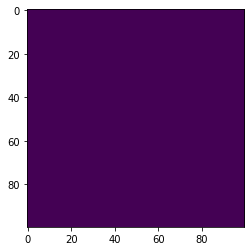

In [42]:
plt.imshow(mult.reshape(100,100))